Draw the bounding boxes over a set of text.

## From -- http://stackoverflow.com/a/23672571/191450
 
This is the second answer to the Question


In [113]:
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import IPython.display


In [121]:
# The image that we want to use

#path = 'ramq.jpg'
path = 'img/bcard3.jpg'

In [122]:
def showimage(cimg):
    img = Image.fromarray(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
    b = BytesIO()
    img.save(b, format='png')

    IPython.display.display(IPython.display.Image(data=b.getvalue(), format='png', embed=True))

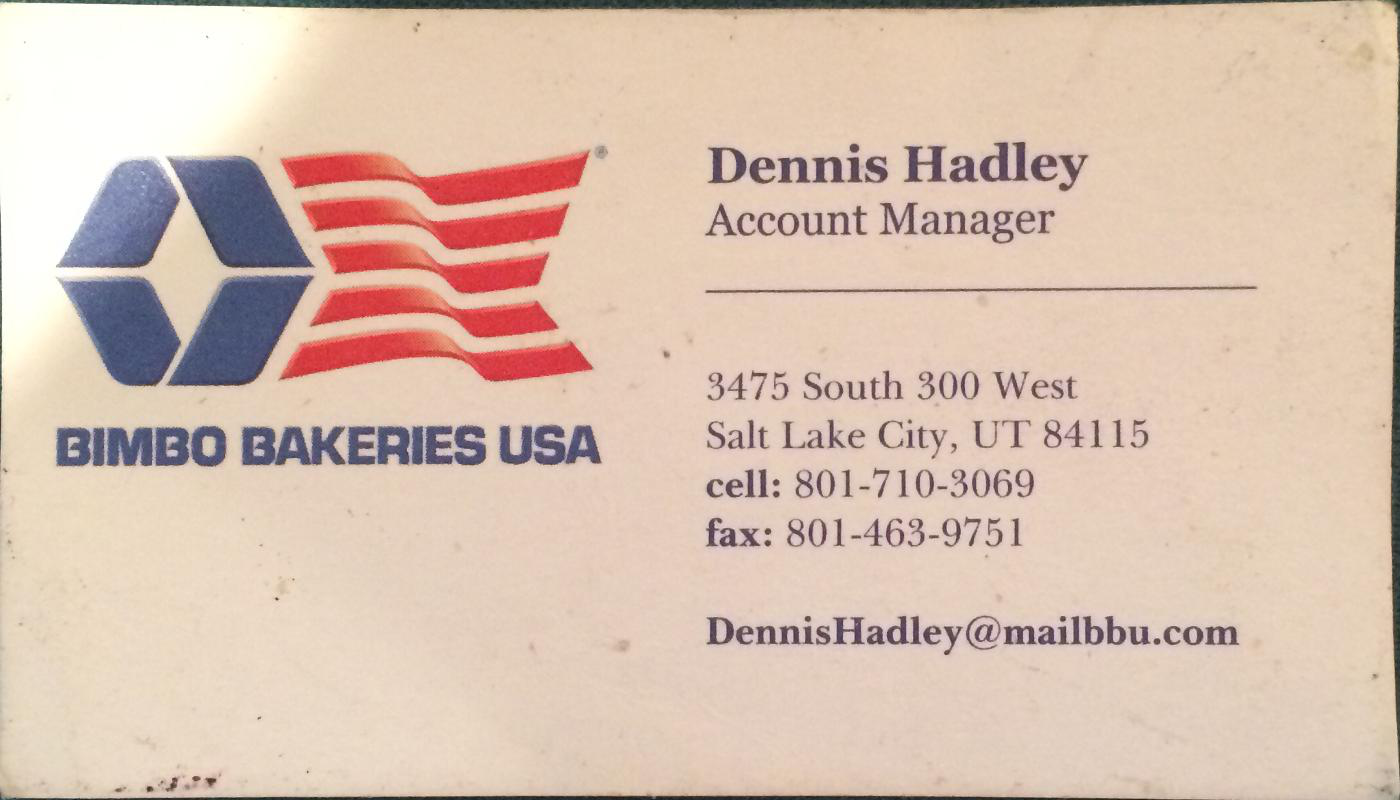

In [123]:
large = cv2.imread(path)

showimage(large)

In [124]:
def hiter(hierarcy):
    """Iterate through the next elements of the hierarchy"""
    idx = 0
    while idx >= 0:
        yield idx
        idx = hierarchy[0][idx][0]

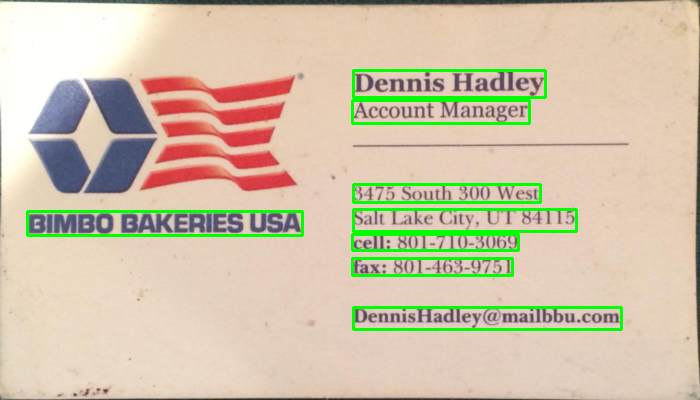

In [125]:
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
#showimage(small)

morphKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, morphKernel)

# Binaarize
_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY|cv2.THRESH_OTSU)

# Connect horizontally oriented regions
morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, morphKernel)

# Find contours
im2, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
output = rgb.copy()

# Filter contours
for idx in hiter(hierarchy):
    x, y, w, h = cv2.boundingRect(contours[idx])
    
    # Fill the contours
    mask = np.zeros(bw.shape, dtype=np.uint8)
    cv2.drawContours(mask, contours, idx, (255,255,255), cv2.FILLED)
    
    # Ratio of the non-zero to zero pixels in the filled region
    r = float(cv2.countNonZero(mask)) / float(w * h)
    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)

showimage(output)